In [12]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow import keras


In [9]:
df = pd.read_csv("dfts1k.csv")

In [10]:
df.head()

,Moneyness,V0,T,Omega,Alpha,Beta,Call_Price,Put Price
0,1.033867,0.000521,0.255874,9.751774e-07,0.059722,0.488584,0.000000,15.185336
1,1.034362,0.000521,0.255874,9.751774e-07,0.059722,0.488584,4.741506,0.002466
2,1.033132,0.000521,0.255874,9.751774e-07,0.059722,0.488584,0.000000,6.842859
3,1.033435,0.000521,0.255874,9.751774e-07,0.059722,0.488584,0.000000,30.409358
4,1.032603,0.000521,0.255874,9.751774e-07,0.059722,0.805809,0.000000,15.311745


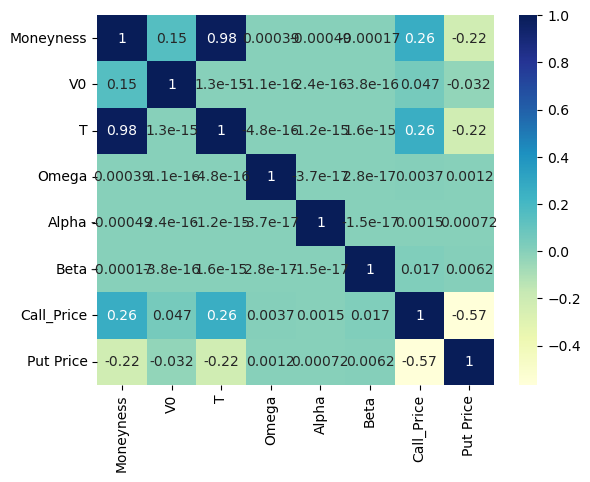

In [11]:
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True) 
plt.show()

In [100]:
x = df.drop(['Call_Price','Put Price'],axis=1)
yc = df['Call_Price']
yp = df['Put Price']

In [101]:
# divide data into training set and test set
Xc_train,Xc_test,yc_train,yc_test=train_test_split(x,yc,test_size=0.25,random_state=100)
Xp_train,Xp_test,yp_train,yp_test=train_test_split(x,yp,test_size=0.25,random_state=100)

# divide training set into training and validation set
Xc_train,Xc_val,yc_train,yc_val=train_test_split(Xc_train,yc_train,test_size=0.25,random_state=100)
Xp_train,Xp_val,yp_train,yp_val=train_test_split(Xp_train,yp_train,test_size=0.25,random_state=100)

In [102]:
# Scale features
scaler = StandardScaler()
scaler.fit(X_train)

Xc_scaled_train = scaler.transform(Xc_train)
Xp_scaled_train = scaler.transform(Xp_train)

Xc_scaled_vals = scaler.transform(Xc_val)
Xp_scaled_vals = scaler.transform(Xp_val)

Xc_scaled_test = scaler.transform(Xc_test)
Xp_scaled_test = scaler.transform(Xp_test)

yc_train = np.asarray(yc_train)
yp_train = np.asarray(yp_train)

yc_val = np.asarray(yc_val)
yp_val = np.asarray(yp_val)

yc_test = np.asarray(yc_test)
yp_test = np.asarray(yp_test)

In [103]:
tf.random.set_seed(123)
modelc = keras.Sequential([
    keras.layers.Flatten(input_shape=(Xc_train.shape[1],)), #the input layer
    keras.layers.Dense(20,activation='sigmoid'), #hidden layer with 20 neurons and sigmoid activation function
    keras.layers.Dense(20,activation='sigmoid'),
    keras.layers.Dense(20,activation='sigmoid'),
    keras.layers.Dense(1,activation='exponential') 
])

modelc.compile(optimizer = 'adam',loss = 'mse')
modelc.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 6)                 0         
                                                                 
 dense_4 (Dense)             (None, 20)                140       
                                                                 
 dense_5 (Dense)             (None, 20)                420       
                                                                 
 dense_6 (Dense)             (None, 20)                420       
                                                                 
 dense_7 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
_________________________________________________________________


In [106]:
historyp = modelc.fit(Xp_train,yp_train,epochs=100,batch_size=32,validation_data=(Xp_val,yp_val))

Epoch 1/100
288/288 [==============================] - 1s 4ms/step - loss: 118.5172 - val_loss: 111.2927
Epoch 2/100
288/288 [==============================] - 1s 4ms/step - loss: 109.1216 - val_loss: 108.5727
Epoch 3/100
288/288 [==============================] - 1s 4ms/step - loss: 108.1629 - val_loss: 108.7017
Epoch 4/100
288/288 [==============================] - 1s 4ms/step - loss: 108.1507 - val_loss: 108.3150
Epoch 5/100
288/288 [==============================] - 1s 4ms/step - loss: 108.0409 - val_loss: 109.0319
Epoch 6/100
288/288 [==============================] - 1s 4ms/step - loss: 107.9069 - val_loss: 108.3614
Epoch 7/100
288/288 [==============================] - 1s 4ms/step - loss: 107.9137 - val_loss: 108.2144
Epoch 8/100
288/288 [==============================] - 1s 4ms/step - loss: 107.8578 - val_loss: 108.1736
Epoch 9/100
288/288 [==============================] - 1s 4ms/step - loss: 107.9083 - val_loss: 108.5851
Epoch 10/100
288/288 [==============================] -

288/288 [==============================] - 1s 4ms/step - loss: 107.7149 - val_loss: 108.5343
Epoch 79/100
288/288 [==============================] - 1s 4ms/step - loss: 107.7698 - val_loss: 108.3772
Epoch 80/100
288/288 [==============================] - 1s 4ms/step - loss: 107.6392 - val_loss: 108.1854
Epoch 81/100
288/288 [==============================] - 1s 4ms/step - loss: 107.8272 - val_loss: 108.6273
Epoch 82/100
288/288 [==============================] - 1s 4ms/step - loss: 107.7860 - val_loss: 108.3659
Epoch 83/100
288/288 [==============================] - 1s 4ms/step - loss: 107.6477 - val_loss: 108.6058
Epoch 84/100
288/288 [==============================] - 1s 4ms/step - loss: 107.6329 - val_loss: 108.2146
Epoch 85/100
288/288 [==============================] - 1s 4ms/step - loss: 107.8387 - val_loss: 108.6952
Epoch 86/100
288/288 [==============================] - 1s 4ms/step - loss: 107.8055 - val_loss: 108.9080
Epoch 87/100
288/288 [==============================] - 1s 

In [105]:
historyc = modelc.fit(Xc_train,yc_train,epochs=100,batch_size=32,validation_data=(Xc_val,yc_val))

Epoch 1/100
288/288 [==============================] - 1s 4ms/step - loss: 13.9387 - val_loss: 14.1925
Epoch 2/100
288/288 [==============================] - 1s 4ms/step - loss: 13.9356 - val_loss: 14.1221
Epoch 3/100
288/288 [==============================] - 1s 4ms/step - loss: 13.9217 - val_loss: 14.1531
Epoch 4/100
288/288 [==============================] - 1s 4ms/step - loss: 13.9234 - val_loss: 14.1250
Epoch 5/100
288/288 [==============================] - 1s 4ms/step - loss: 13.9135 - val_loss: 14.1142
Epoch 6/100
288/288 [==============================] - 1s 4ms/step - loss: 13.9628 - val_loss: 14.1126
Epoch 7/100
288/288 [==============================] - 1s 5ms/step - loss: 13.9359 - val_loss: 14.2580
Epoch 8/100
288/288 [==============================] - 1s 4ms/step - loss: 13.9176 - val_loss: 14.2174
Epoch 9/100
288/288 [==============================] - 1s 5ms/step - loss: 13.9218 - val_loss: 14.1962
Epoch 10/100
288/288 [==============================] - 1s 4ms/step - los

Epoch 80/100
288/288 [==============================] - 2s 6ms/step - loss: 13.9024 - val_loss: 14.0983
Epoch 81/100
288/288 [==============================] - 1s 5ms/step - loss: 13.9028 - val_loss: 14.1233
Epoch 82/100
288/288 [==============================] - 1s 4ms/step - loss: 13.9228 - val_loss: 14.1305
Epoch 83/100
288/288 [==============================] - 1s 5ms/step - loss: 13.8982 - val_loss: 14.1254
Epoch 84/100
288/288 [==============================] - 1s 4ms/step - loss: 13.9199 - val_loss: 14.1583
Epoch 85/100
288/288 [==============================] - 1s 4ms/step - loss: 13.9099 - val_loss: 14.1379
Epoch 86/100
288/288 [==============================] - 1s 4ms/step - loss: 13.9054 - val_loss: 14.1573
Epoch 87/100
288/288 [==============================] - 1s 5ms/step - loss: 13.8974 - val_loss: 14.0933
Epoch 88/100
288/288 [==============================] - 1s 5ms/step - loss: 13.9144 - val_loss: 14.2019
Epoch 89/100
288/288 [==============================] - 1s 4ms/s

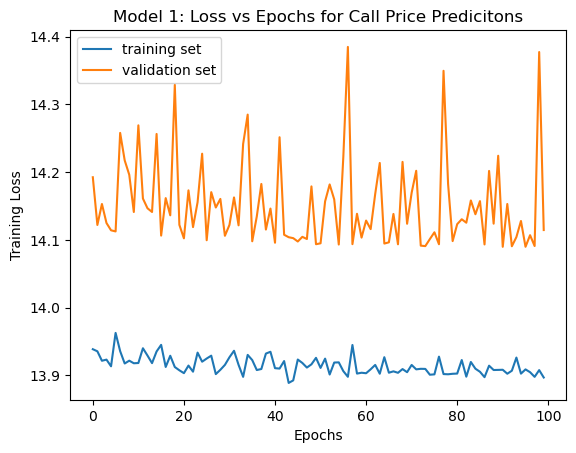

In [109]:
plt.plot(historyc.history['loss'])
plt.plot(historyc.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Model 1: Loss vs Epochs for Call Price Predicitons")
plt.legend(['training set','validation set'])
plt.show()

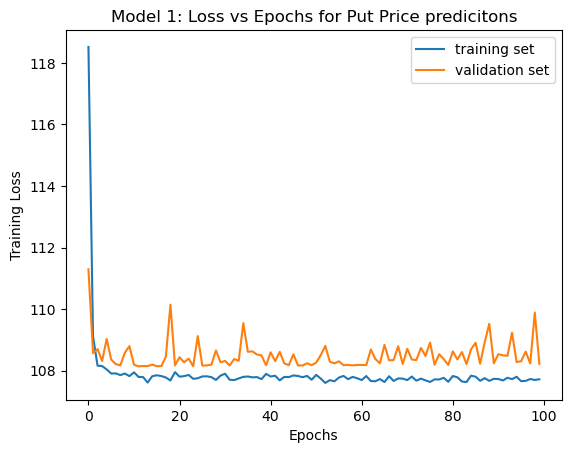

In [110]:
plt.plot(historyp.history['loss'])
plt.plot(historyp.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Model 1: Loss vs Epochs for Put Price predicitons")
plt.legend(['training set','validation set'])
plt.show()

In [116]:
call_history = historyc.history
put_history = historyp.history

In [117]:
modelc.save("modelc.h5")

In [112]:
print(modelc.evaluate(Xc_test,yc_test))
print(modelc.evaluate(Xp_test,yp_test))

128/128 [==============================] - 0s 2ms/step - loss: 94.1223
94.12232208251953
128/128 [==============================] - 0s 2ms/step - loss: 107.8388
107.8387680053711


In [113]:
predsc = modelc.predict(Xc_test)
predsp = modelc.predict(Xp_test)

128/128 [==============================] - 0s 1ms/step


In [57]:
x = np.arange(1,51,1)

In [90]:
random_indices = np.random.choice(len(actual), 50, replace=False)
random_indices
# # Select the corresponding 50 values from each array
# selected_array1 = actual[random_indices]
# selected_array2 = pred[random_indices]
a1 = []
a2=[]
# # Plot a scatter plot for the selected pairs
# plt.scatter(selected_array1, selected_array2)
# plt.xlabel('Array 1')
# plt.ylabel('Array 2')
# plt.title('Scatter Plot of Selected Pairs')
# plt.show()

In [91]:
for i in random_indices:
    a1.append(actual[i])
    a2.append(p[i])

In [94]:
a1

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 12.532791372358185,
 0.0,
 0.0,
 0.0,
 4.540346482297146,
 11.22908181513457,
 0.0,
 1.810887540684902,
 0.0631035597861862,
 0.0710821419632609,
 0.0004220070778071,
 11.652920002192896,
 0.0,
 0.0040499793758304,
 5.606864983774518,
 0.0,
 0.0,
 0.0015635586468852,
 0.0002839902150697,
 3.0823280858829865,
 0.0941741292971929,
 0.0,
 5.029353176614648,
 12.76790188350637,
 0.0,
 0.0334241850623541,
 0.0002146228206504,
 0.0,
 0.0008068656787109,
 4.625216892345463,
 11.282181896580806,
 0.0432564141804371,
 5.651542960863003,
 0.0,
 0.0,
 10.111428434248047,
 5.3148798271079345,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

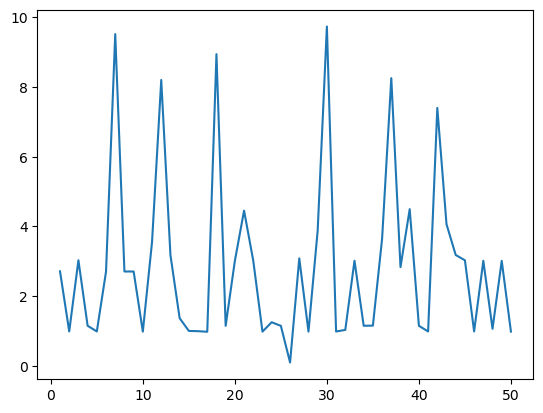

In [95]:
errors = []

for i in range(len(a1)):
    errors.append(abs(a1[i]-a2[i]))
plt.plot(x,errors)

In [96]:
ae = pd.DataFrame({'Actual':actual,'Predicted':p})
ae.head()

,Actual,Predicted
0,5.682956,1.146687
1,0.010376,3.017633
2,0.000178,3.023703
3,5.616508,1.253097
4,0.103084,2.877136


In [97]:
len(ae)

4096